In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
Cat_4=cv2.imread('Dataset/Training_Set/Cats/cat.4.jpg')
Cat_4=cv2.cvtColor(Cat_4,cv2.COLOR_BGR2RGB)

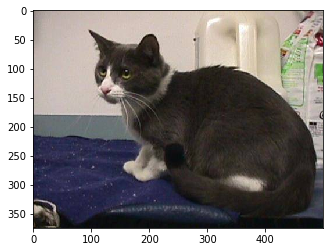

In [3]:
plt.imshow(Cat_4)

In [4]:
Cat_4.shape

(375, 499, 3)

In [5]:
Dog_4=cv2.imread('Dataset/Training_Set/Dogs/Dog.4.jpg')
Dog_4=cv2.cvtColor(Dog_4,cv2.COLOR_BGR2RGB)

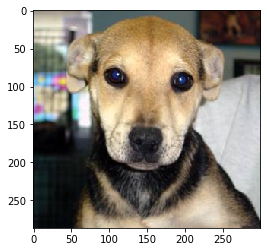

In [6]:
plt.imshow(Dog_4)

In [7]:
Dog_4.shape

(287, 300, 3)

In [8]:
Dog_4.shape

(287, 300, 3)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
Image_Gen=ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
                            )

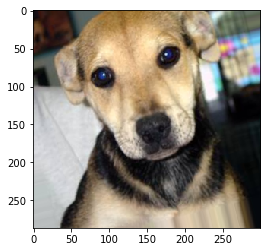

In [11]:
plt.imshow(Image_Gen.random_transform(Dog_4))

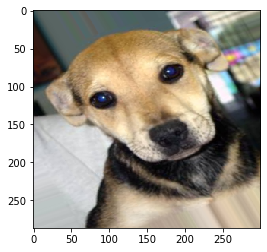

In [12]:
plt.imshow(Image_Gen.random_transform(Dog_4))

In [13]:
Image_Gen.flow_from_directory('Dataset/Training_Set')

Found 8000 images belonging to 2 classes.


In [14]:
Image_Gen.flow_from_directory('Dataset/Test_Set')

Found 2000 images belonging to 2 classes.


In [15]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [16]:
Model=Sequential()

Model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))


Model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

Model.add(Flatten())

Model.add(Dense(128,activation='relu'))
Model.add(Dropout(0.5))

Model.add(Dense(1,activation='sigmoid'))

Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
Early_Stopping=EarlyStopping(monitor='val_loss',patience=2)

In [20]:
# BATCH_SIZE=32
# INPUT_SHAPE=(150,150)
Train_Image_Gen=Image_Gen.flow_from_directory('Dataset/Training_Set',
                                              target_size=(150,150), 
                                              batch_size=32,
                                              class_mode='binary'
                                             )

Found 8000 images belonging to 2 classes.


In [21]:
Test_Image_Gen=Image_Gen.flow_from_directory('Dataset/Test_Set',
                                              target_size=(150,150),
                                              batch_size=32,
                                              class_mode='binary',
                                             )

Found 2000 images belonging to 2 classes.


In [22]:
Train_Image_Gen.class_indices

{'Cats': 0, 'Dogs': 1}

In [23]:
Test_Image_Gen.class_indices

{'Cats': 0, 'Dogs': 1}

In [24]:
# BATCH SIZE:32,STEPS PER EPOCH:150,(32*150)IMAGES ARE TRAINED PER EPOCH 
Model.fit_generator(Train_Image_Gen,validation_data=Test_Image_Gen,epochs=5,validation_steps=15,steps_per_epoch=150,callbacks=[Early_Stopping])

Epoch 1/5
150/150 [==============================] - 396s 3s/step - loss: 0.6951 - accuracy: 0.5490 - val_loss: 0.6841 - val_accuracy: 0.5813
Epoch 2/5
150/150 [==============================] - 390s 3s/step - loss: 0.6750 - accuracy: 0.6042 - val_loss: 0.6647 - val_accuracy: 0.6292
Epoch 3/5
150/150 [==============================] - 352s 2s/step - loss: 0.6556 - accuracy: 0.6225 - val_loss: 0.6401 - val_accuracy: 0.6708
Epoch 4/5
150/150 [==============================] - 378s 3s/step - loss: 0.6415 - accuracy: 0.6435 - val_loss: 0.6095 - val_accuracy: 0.6625
Epoch 5/5
150/150 [==============================] - 398s 3s/step - loss: 0.6265 - accuracy: 0.6504 - val_loss: 0.6806 - val_accuracy: 0.5833


In [25]:
Model.history.history

{'loss': [0.6951073320706685,
  0.6750458908081055,
  0.6556486149628957,
  0.6414762985706329,
  0.6264887873331706],
 'accuracy': [0.54895836, 0.6041667, 0.6225, 0.6435417, 0.6504167],
 'val_loss': [0.6840718030929566,
  0.664671250184377,
  0.640144165356954,
  0.6094739894072215,
  0.6806238691012064],
 'val_accuracy': [0.58125, 0.62916666, 0.67083335, 0.6625, 0.5833333]}

In [26]:
# PREDICTING ON NEW IMAGE:
# DOG:
Dog='Dataset/Training_Set/Dogs/Dog.4.jpg'

In [27]:
from tensorflow.keras.preprocessing import image

In [28]:
Dog_Image=image.load_img(Dog,target_size=(150,150))

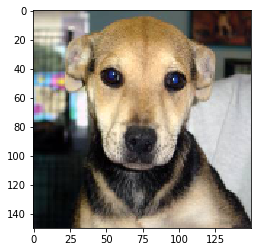

In [29]:
plt.imshow(Dog_Image)

In [30]:
# CONVERSION TO ARRAY:
Dog_Image=image.img_to_array(Dog_Image)

In [31]:
Dog_Image.shape

(150, 150, 3)

In [32]:
import numpy as np

In [33]:
# EXPANSION OF DIMENSION:
Dog_Image=np.expand_dims(Dog_Image,axis=0)

In [34]:
# ONE IMAGE HAVING THE SHAPE(150,150,3)
Dog_Image.shape

(1, 150, 150, 3)

In [35]:
Dog_Image=Dog_Image/255

In [36]:
Model.predict_classes(Dog_Image)

array([[1]])

In [37]:
Model.predict(Dog_Image)

array([[0.6507384]], dtype=float32)

In [38]:
# CAT:
Cat='Dataset/Training_Set/Cats/Cat.4.jpg'
Cat_Image=image.load_img(Cat,target_size=(150,150))
Cat_Image=image.img_to_array(Cat_Image)
Cat_Image=np.expand_dims(Cat_Image,axis=0)

In [39]:
Cat_Image=Cat_Image/255

In [40]:
Model.predict_classes(Cat_Image)

array([[0]])

In [41]:
Model.predict(Cat_Image)

array([[0.20055906]], dtype=float32)